# ***PROYECTO 2***

## PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

- Detección y eliminación de Outliers
- Encoding
- Imputación de valores faltantes
- Escalado de datos
- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

En primer lugar, vamos a importar la librerías requeridas y a cargar nuevamente el datset y consultaremos cuántas filas y columnas tiene.

In [1]:
# Importando las librerías
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Carga del dataset con los filtros iniciales
bd= pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
bd.shape

(146660, 19)

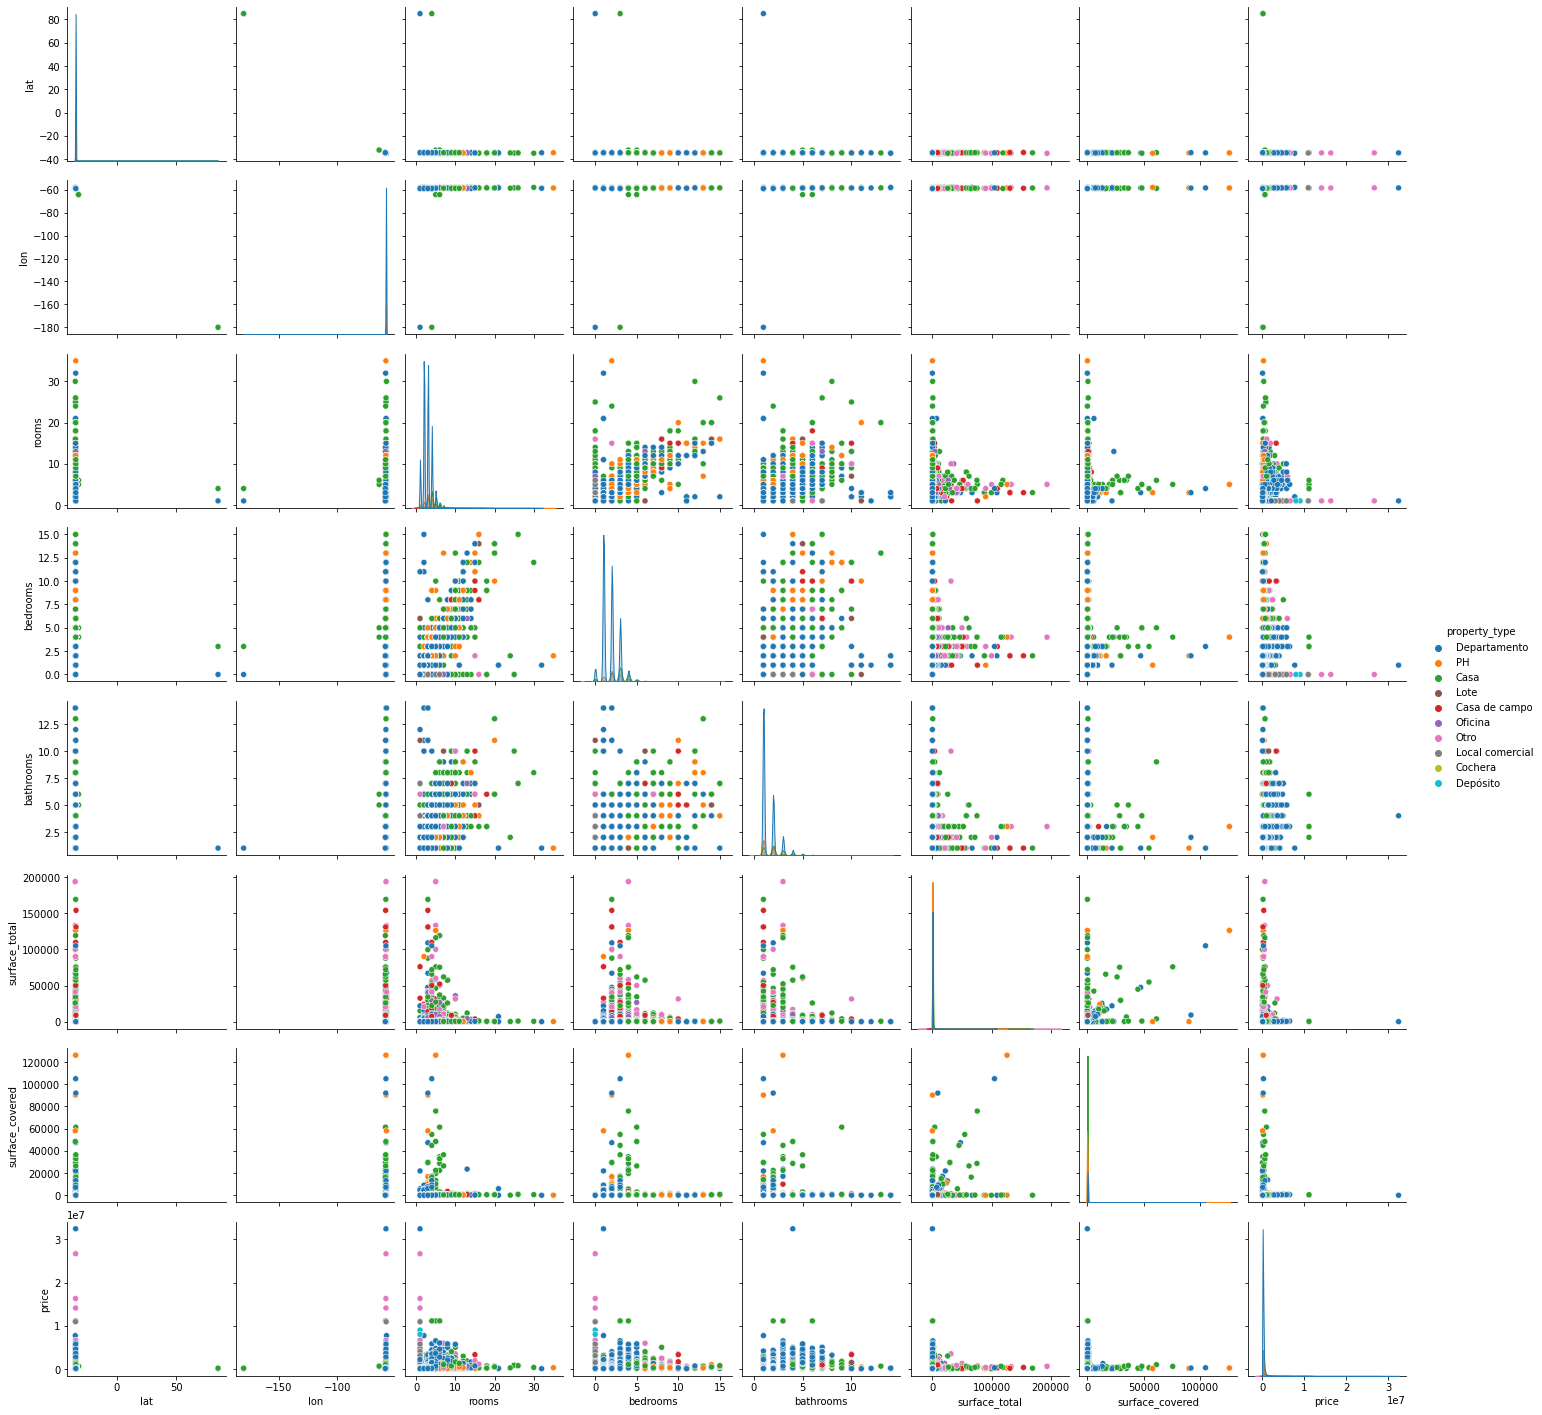

In [2]:
# Recordemos la distribución por pares de variables del dataset y para diferenciar un poco al pairplot del proyecto 1, le daremos la instrucción de no tener en cuenta nos valores nulos
sns.pairplot(data=bd, hue='property_type',dropna=True)

In [3]:
#Resúmen descriptivo de los datos
bd.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


En los resultados anteriores se pueden encontrar valores atípicos en las principales variables predictoras que se utilizaron en el proyecto 1: área total y construída, precio, salones, baños y habitaciones, ya que en los plots se aprecian situaciones como las siguientes:
- Precios muy elevados en comparación a otras propiedades con las mismas áreas o la misma cantidad de salones.
- Áreas construídas superiores al área total o demasiado grandes con relación al número de salones de la mayoría de las propiedades
- Número de salones (salones, baños, habitaciones) muy elevados en comparación con otras propiedades de areas similares, lo cual podría ser indicio de que se trate de algún hotel

## Detección y eliminación de valores atípicos

En las siguientes líneas vamos a identificar y eliminar valores atípicos en las principales variables predictoras que se utilizaron en el proyecto 1: área total y construída, precio, salones, baños y habitaciones

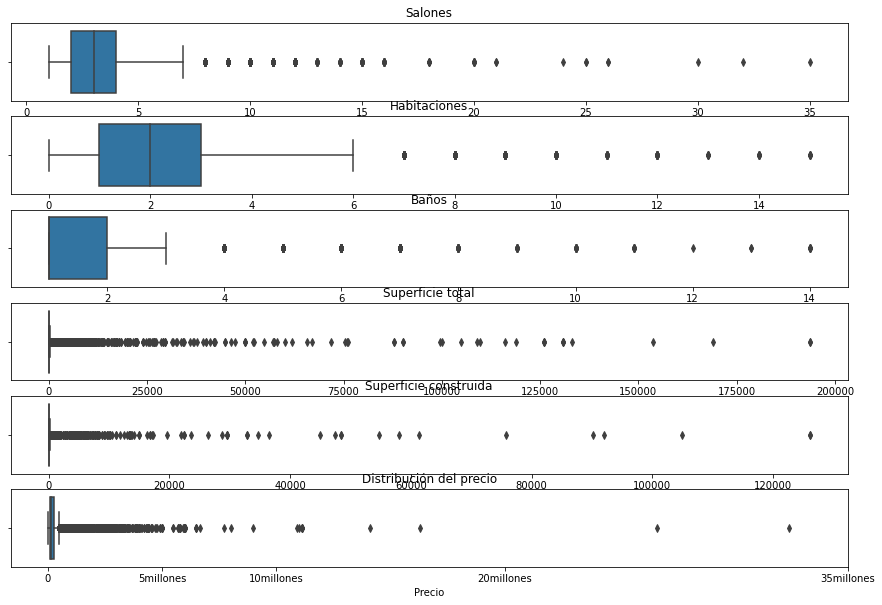

In [4]:
#Valores
plt.figure(figsize=(15,10))
plt.subplot(611)
sns.boxplot(data = bd, x = "rooms")
plt.title('Salones')
plt.subplot(612)
sns.boxplot(data = bd, x = "bedrooms")
plt.title('Habitaciones')
plt.subplot(613)
sns.boxplot(data = bd, x= "bathrooms")
plt.title('Baños')
plt.subplot(614)
sns.boxplot(data = bd, x = "surface_total")
plt.title('Superficie total')
plt.subplot(615)
sns.boxplot(data = bd, x = "surface_covered")
plt.title('Superficie construida')
plt.subplot(616)
sns.boxplot(data=bd, x='price')
plt.title('Distribución del precio')
plt.xlabel('Precio')
plt.xticks([0,5000000,10000000,20000000,35000000], labels=['0','5millones','10millones','20millones','35millones'])
plt.show()

Estos gráficos muestran valores atípicos  en  las seis variables y  sólamente en la región superior de la  distribución, razón por la cual eliminaremos estos valores atípicos basados en la técnica del rango intercuartílico aplicando una distancia de  1,5  iqr y en algunos casos la regla de 3 sigma

In [5]:
#rango intercuartílico  para rooms
q25,q75 = np.percentile(bd.rooms.values, [25,75])
iqr_rooms = q75 - q25
minimo_rooms = q25 - 1.5*iqr_rooms
maximo_rooms = q75 + 1.5*iqr_rooms
mascara_outliers_rooms = (bd.rooms < minimo_rooms) | (bd.rooms > maximo_rooms)
print('Para el número de salones tenemos ',mascara_outliers_rooms.sum(),' valores atípicos',
    'un rango mínimo de ',{minimo_rooms},'y máximo de',{maximo_rooms})

Para el número de salones tenemos  1447  valores atípicos un rango mínimo de  {-1.0} y máximo de {7.0}


In [6]:
#rango intercuartílico  para bedrooms
q25,q75 = np.percentile(bd.bedrooms.values, [25,75])
iqr_bedrooms = q75 - q25
minimo_bedrooms = q25 - 1.5*iqr_bedrooms
maximo_bedrooms = q75 + 1.5*iqr_bedrooms
mascara_outliers_bedrooms = (bd.bedrooms < minimo_bedrooms) | (bd.bedrooms > maximo_bedrooms)
print('Para el número de habitaciones tenemos ',mascara_outliers_bedrooms.sum(),' valores atípicos',
    'un rango mínimo de ',{minimo_bedrooms},'y máximo de',{maximo_bedrooms})

Para el número de habitaciones tenemos  428  valores atípicos un rango mínimo de  {-2.0} y máximo de {6.0}


In [7]:
#rango intercuartílico  para bathrooms
#q25,q75 = np.percentile(bd.bathrooms.values, [25,75])
#iqr_bathrooms = q75 - q25
#minimo_bathrooms = q25 - 1.5*iqr_bathrooms
#maximo_bathrooms = q75 + 1.5*iqr_bathrooms
#mascara_outliers_bathrooms = (bd.bathrooms < minimo_bathrooms) | (bd.bathrooms > maximo_bathrooms)
#print('Para el número de baños tenemos ',mascara_outliers_bathrooms.sum(),' valores atípicos',
#    'un rango mínimo de ',{minimo_bathrooms},'y máximo de',{maximo_bathrooms})

#tres sigma para bathrooms
valor_medio = bd.bathrooms.mean()
std = bd.bathrooms.std()
minimobathrooms = valor_medio - 3*std
maximobathrooms = valor_medio + 3*std
mascara_outliersbathrooms = np.logical_or(bd.bathrooms < minimobathrooms, bd.bathrooms > maximobathrooms)
print('Para el número de baños tenemos ',mascara_outliersbathrooms.sum(),' valores atípicos',
    'un rango mínimo de ',{minimobathrooms},'y máximo de',{maximobathrooms})

Para el número de baños tenemos  1646  valores atípicos un rango mínimo de  {-1.0679784697290688} y máximo de {4.267967098258667}


In [8]:
#rango intercuartílico  para surface_total
#q25,q75 = np.percentile(bd.surface_total.values, [25,75])
#iqr_surface_total = q75 - q25
#minimo_surface_total = q25 - 1.5*iqr_surface_total
#maximo_surface_total = q75 + 1.5*iqr_surface_total
#mascara_outliers_surface_total = (bd.surface_total < minimo_surface_total) | (bd.surface_total > maximo_surface_total)
#print('Para el área total tenemos ',mascara_outliers_surface_total.sum(),' valores atípicos',
#    'un rango mínimo de ',{minimo_surface_total},'y máximo de',{maximo_surface_total})

#tres sigma para surface_total
valor_medio = bd.surface_total.mean()
std = bd.surface_total.std()
minimosurface_total = valor_medio - 3*std
maximosurface_total = valor_medio + 3*std
mascara_outlierssurface_total = np.logical_or(bd.surface_total < minimosurface_total, bd.surface_total > maximosurface_total)
print('Para el número de baños tenemos ',mascara_outlierssurface_total.sum(),' valores atípicos',
    'un rango mínimo de ',{minimosurface_total},'y máximo de',{maximosurface_total})

Para el número de baños tenemos  331  valores atípicos un rango mínimo de  {-5895.94705872814} y máximo de {6329.692835011904}


In [9]:
#rango intercuartílico  para surface_covered
#q25,q75 = np.percentile(bd.surface_covered.values, [25,75])
#iqr_surface_covered = q75 - q25
#minimo_surface_covered = q25 - 1.5*iqr_surface_covered
#maximo_surface_covered = q75 + 1.5*iqr_surface_covered
#mascara_outliers_surface_covered = (bd.surface_covered < minimo_surface_covered) | (bd.surface_covered > maximo_surface_covered)
#print('Para la superficie construída tenemos ',mascara_outliers_surface_covered.sum(),' valores atípicos',
#    'un rango mínimo de ',{minimo_surface_covered},'y máximo de',{maximo_surface_covered})

#tres sigma para surface_covered
valor_medio = bd.surface_covered.mean()
std = bd.surface_covered.std()
minimosurface_covered = valor_medio - 3*std
maximosurface_covered = valor_medio + 3*std
mascara_outliersurface_covered = np.logical_or(bd.surface_covered < minimosurface_covered, bd.surface_covered > maximosurface_covered)
print('Para el número de baños tenemos ',mascara_outliersurface_covered.sum(),' valores atípicos',
    'un rango mínimo de ',{minimosurface_covered},'y máximo de',{maximosurface_covered})

Para el número de baños tenemos  201  valores atípicos un rango mínimo de  {-2637.7547401633074} y máximo de {2863.390762107232}


In [10]:
#rango intercuartílico  para price
q25,q75 = np.percentile(bd.price.values, [25,75])
iqr_price = q75 - q25
minimo_price = q25 - 1.5*iqr_price
maximo_price = q75 + 1.5*iqr_price
mascara_outliers_price = (bd.price < minimo_price) | (bd.price > maximo_price)
print('Para el precio ',mascara_outliers_price.sum(),' valores atípicos',
    'un rango mínimo de ',{minimo_price},'y máximo de',{maximo_price})

Para el precio  10982  valores atípicos un rango mínimo de  {-120000.0} y máximo de {496000.0}


En las líneas anteriores identificamos los valores atípicos utilizando la técnica del rango intercuartílico para el precio, el número de salones y el número de habitaciones; para las áreas total, construída y el número de baños se aplica en segunda instancia la regla de las tres sigma ya que no funcionó el rango intercuartílico por la distribución de las variables (correr las líneas comentariadas).

Por otra parte, si comparamos los resultados anteriores con los boxplots y el resúmen estadístio previo (valores mínimos), se puede observar que el total de valores atípicos identificados corresponden a valores de la región superior de los boxplots, por lo cual, del dataset filtraremos aquellas instancias que sean menores al valor máximo identificado para cada variable con las tres sigma o rango intercuartílico.

In [11]:
#Nueva base de datos sin valores atípicos
bd2= bd[(bd.rooms < maximo_rooms)&(bd.bedrooms < maximo_bedrooms)&(bd.bathrooms < maximobathrooms)&(bd.surface_total < maximosurface_total)&(bd.surface_covered < maximosurface_covered)&(bd.price < maximo_price)]
#bd2.shape
bd2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,104241.000000,104241.000000,111348.000000,111348.000000,111348.000000,111348.000000,111348.000000,111348.000000
mean,-34.599071,-58.464530,2.917179,1.918238,1.438266,125.308178,78.786148,183759.009241
std,0.095161,0.140208,1.104759,0.918747,0.663622,243.215969,60.787888,96894.035231
min,-35.150806,-59.042416,1.000000,0.000000,1.000000,10.000000,1.000000,6000.000000
25%,-34.621309,-58.501817,2.000000,1.000000,1.000000,50.000000,45.000000,110000.000000
50%,-34.599252,-58.443919,3.000000,2.000000,1.000000,72.000000,63.000000,159900.000000
75%,-34.573316,-58.412983,4.000000,3.000000,2.000000,115.000000,93.000000,239000.000000
max,-34.202767,-57.805832,6.000000,5.000000,4.000000,6085.000000,2773.000000,495000.000000


## Imputación de valores faltantes

De la línea anterior y en la siguiente se puede observar que las únicas variables que quedan con valores faltantes son la latitud y longitud, por los cual se hará la imputación de valores faltantes para estas dos variables sólo con fines prácticos ya que dichos atributos no serán tenidos en cuenta en los modelos que se  entrenan más adelante.

In [12]:
bd2.isna().sum()

start_date            0
end_date              0
created_on            0
lat                7107
lon                7107
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

En las siguientes dos líneas se observa cómo se distribuyen estos valores faltantes respecto a los tipos de propiedad, donde se aprecia que ambos atributos tienen la misma cantidad de nulos por tipo de propiedad, lo cual parece indicar una fuerte dependencia entre el valor faltante y el tipo de propiedad (por ejemplo para las casas, departamentos y ph es posible que algunas personas prefieran no hacer pública su ubicación) y por otra parte, que las instancias con valores nulos tienen en blanco ambas instancias. En conclusión estamos frente a un caso MAR-mising at random.

In [13]:
#Valores faltante en latitud respecto al tipo de propiedad
bd2.lat.isnull().groupby([bd2['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,694
1,Casa de campo,12
2,Cochera,0
3,Departamento,6002
4,Depósito,1
5,Local comercial,0
6,Lote,0
7,Oficina,19
8,Otro,6
9,PH,373


In [14]:
#Valores faltantes en longitud respecto al tipo de propiedad
bd2.lon.isnull().groupby([bd2['property_type']]).sum().astype(int).reset_index(name='count')

,property_type,count
0,Casa,694
1,Casa de campo,12
2,Cochera,0
3,Departamento,6002
4,Depósito,1
5,Local comercial,0
6,Lote,0
7,Oficina,19
8,Otro,6
9,PH,373


Dado que la latitud y la longitud son valores de georeferenciación y no una medición, se impuntará la ubicación en base al método de la última observación válida 'ffill'

In [15]:
bd3= bd2.fillna(method='ffill',axis=0)

In [16]:
bd3.isna().sum()

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64

### Reentrenamiento modelo del proyecto 1 (primera parte)
A medida que vamos realizando el preprocesamiento de los datos iremos reentrenando el modelo seleccionado en el proyecto 1 con el fin de ir evidenciando el impacto de las transformaciones en el desarrollo del modelo. 
Primero recordemos que la métrica seleccionada fue el ***RMSE*** y que el modelo con mejor RMSE obtenido fue la regresión mediante árboles de decisición con las siguientes métricas:
- La raíz del error cuadrático medio en Train es de: 64721.0697732051
- La raíz del error cuadrático medio en Test es de: 146702.44054503654

In [17]:
#eliminemos los features que no nos interesan
bd3= bd3.drop(columns=['start_date','end_date','created_on','l1','l2','l3','currency','title','description','operation_type'])

In [18]:
#reentrenado el modelo luego de eliminar valores atípicos
X= bd3.drop(columns=['price','property_type'])
y= bd3['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)
tree_op= DecisionTreeRegressor(max_depth = 17, random_state=20)
tree_op.fit(X_train, y_train)
y_train_pred_arbol = tree_op.predict(X_train)
y_test_pred_arbol = tree_op.predict(X_test)

rmse_train_arbol = np.sqrt(mean_squared_error(y_train, y_train_pred_arbol))
rmse_test_arbol = np.sqrt(mean_squared_error(y_test, y_test_pred_arbol))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_arbol}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_arbol}')

La raíz del error cuadrático medio en Train es de: 21483.297589425485
La raíz del error cuadrático medio en Test es de: 46894.82648908877


El resultado anterior muestra cómo la eliminación de los datos atípicos permitió mejorar el desempeño del modelo especialmento con las predicciones del conjunto de test (prueba). Continuemos aplicando otras técnicas de prepocesamiento

## Escalado de datos

En el dataframe encontramos algunas variables como el precio y las áreas que tienen unas magnitudes escalares muy amplias respectos a los salones, habitaciones, baños. 

A continuación se aplica el método de escalado de sklearn con el cual se obtiene un nuevo dataframe

In [19]:
#Carga  de librería de escalado de sklearn
from sklearn.preprocessing import StandardScaler as ss

In [20]:
#Objeto de escalado
scaler= ss()

In [21]:
#base para aplicar el escalado
bd4= bd3.copy().drop(columns=['lat','lon','property_type','price'])
bd4.shape

(111348, 5)

In [22]:
#se entrena  y aplica  el escalado de datos
nbd4= scaler.fit_transform(bd4)

In [23]:
bd4=pd.DataFrame(nbd4,columns=bd4.columns)
bd4

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,-0.830211,-0.999450,0.846471,-0.227405,-0.341947
1,-0.830211,-0.999450,-0.660417,-0.330194,-0.555806
2,-0.830211,-0.999450,-0.660417,-0.165731,-0.473553
3,-0.830211,-0.999450,-0.660417,-0.309636,-0.720314
4,-0.830211,-0.999450,-0.660417,-0.284967,-0.374849
...,...,...,...,...,...
111343,-0.830211,-0.999450,-0.660417,-0.293190,-0.506454
111344,0.980147,1.177436,0.846471,0.159085,0.184476
111345,-1.735389,-0.999450,-0.660417,-0.309636,-0.720314
111346,-0.830211,-0.999450,-0.660417,-0.358975,-0.670961


### Reentrenamiento modelo del proyecto 1 (segunda parte)
Ahora evaluemos de nuevo el modelo, esta vez además de haber eliminado los valores atípicos, se han escalado las variables predictoras o variables de entrada

In [24]:
#reentrenado el modelo luego de eliminar valores atípicos
X= bd4
y= bd3['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)
tree_op= DecisionTreeRegressor(max_depth = 17, random_state=20)
tree_op.fit(X_train, y_train)
y_train_pred_arbol = tree_op.predict(X_train)
y_test_pred_arbol = tree_op.predict(X_test)

rmse_train_arbol = np.sqrt(mean_squared_error(y_train, y_train_pred_arbol))
rmse_test_arbol = np.sqrt(mean_squared_error(y_test, y_test_pred_arbol))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_arbol}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_arbol}')

La raíz del error cuadrático medio en Train es de: 47215.70944430257
La raíz del error cuadrático medio en Test es de: 62359.00511438843


Esta vez se observa que no continúo mejorando el modelo al aplicar el escalado sobre los datos, por lo cual, no es buena idea implementarlo en el modelo

## Encoding

El tipo de propiedad es una variable que puede ser determinante en la fijación del precio de una propidad, ya que generalmente es diferente el precio de un departamento respecto a una casa o un PH anque el núermo de salores y áreas sean similares. Es por ello que con el fin de incluir esta variable al modelo de regresión, se le aplicará una técnica de encoding para transformar esta variable categórica en una variable numérica y por último tendremos en cuenta que se trata de una variable categórica nominal por lo cual se la aplicará una técnica de one-hot encoding

<AxesSubplot:xlabel='count', ylabel='property_type'>

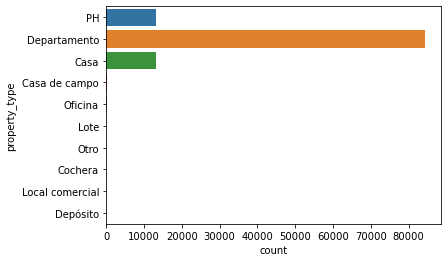

In [25]:
#Veamos la distribución de los tipos de propidad
sns.countplot(data=bd3, y= 'property_type')

Por el resultado anterior, antes de hacer el encoder primero filtraremos el dataset para trabajar sólo con casas, departamentos y PH

In [26]:
bd3=bd3[(bd3['property_type'].isin(['Departamento','Casa','PH']))]
bd3.shape         

(110687, 9)

In [27]:
#usando método de pandas para obtener dummies a partir del tipo de propiedad
dummies= pd.get_dummies(bd3.property_type)
bd5= pd.concat([bd3,dummies],axis=1)

In [28]:
#se debe eliminar una columna dummie para eliminar la multicolinealidad presente en las tres columnas nuevas
bd5= bd5.drop(columns='PH')
bd5

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,Casa,Departamento
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH,0,0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0,0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH,0,0
4,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,PH,0,0
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH,0,0
...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento,0,1
146656,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento,0,1
146657,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento,0,1
146658,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento,0,1


Con el arreglo anterior podemos introducir al modelo de regresión el tipo de propiedad como una variable predictora, así, cuando Casa tiene el valor 1 indica que es una Casa e igual para el Departamento, si Casa es 0 y Departamento es 0 quiere decir que el tipo de propiedad es PH

Practiquemos el procedimiento anterior pero usando las herramientas de sklearn

In [29]:
#selección de la variable categórica nominal
bd51= bd3[['property_type']]

In [30]:
#Carga de libreria de encoding
from sklearn.preprocessing import OneHotEncoder

In [31]:
#crear objeto de encoding indicando que elimine la primer variable dummy
enc = OneHotEncoder(drop='first')

In [32]:
#entrenamiento y aplicación del encoding
ndb51= enc.fit_transform(bd51).toarray()

In [33]:
#nombres del arreglo nuevo
enc.get_feature_names()

array(['x0_Departamento', 'x0_PH'], dtype=object)

In [34]:
#transformar el arrego en un dataset
bd51=pd.DataFrame(ndb51,columns=['Departamento','PH'])

In [35]:
bd6f=pd.concat([bd3,bd51],axis=1)
bd6f

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,Departamento,PH
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH,0.0,1.0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0.0,1.0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH,0.0,1.0
4,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,PH,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento,NaN,NaN
146656,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento,NaN,NaN
146657,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento,NaN,NaN
146658,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento,NaN,NaN


### Reentrenamiento modelo del proyecto 1 (tercera parte)
Evaluemos nuevamente el modelo aplicando el encoding para incluir el tipo de propiedad como variable predictora más la eliminación de valores atípicos mostrada en la primera parte de este reentrenamiento

In [36]:
#reentrenado el modelo luego de eliminar valores atípicos
X= bd5.drop(columns=['price','property_type'])
y= bd5['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)
tree_op= DecisionTreeRegressor(max_depth = 17, random_state=20)
tree_op.fit(X_train, y_train)
y_train_pred_arbol = tree_op.predict(X_train)
y_test_pred_arbol = tree_op.predict(X_test)

rmse_train_arbol = np.sqrt(mean_squared_error(y_train, y_train_pred_arbol))
rmse_test_arbol = np.sqrt(mean_squared_error(y_test, y_test_pred_arbol))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_arbol}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_arbol}')

La raíz del error cuadrático medio en Train es de: 20956.70821305646
La raíz del error cuadrático medio en Test es de: 46169.74822259385


Comparando el error obtenido respecto al obtenido en el reentrenamiento sólo con la eliminación de los valores atípicos, esperaba obtener una mejora en el desempeño del modelo mucho mayor al incluir el tipo de propiedad como variable predictora respecto al desempeño que se acaba de mostrar el cual sigue siendo bueno.

## Reducción de dimensionalidad SVD

Vamos a seleccionar sólo las variables que nos han venido interesando para la predicción del precio y aplicaremos la reducción de dimensionalidad SVD para reducir a tres componentes el número de variables predictoras

In [37]:
bd6= bd5[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered','Departamento','Casa']]

In [38]:
#cargamos la librería de SVD
from sklearn.decomposition import TruncatedSVD

In [39]:
#Creación de objeto de reducción
svd = TruncatedSVD(n_components=4, random_state=42)

#entrenamiento y aplicación de la reducción de variables
bd6= svd.fit_transform(bd6)
bd6

array([[ 8.33109820e+01,  3.64768579e+01, -5.89230737e-01,
         3.98073219e-01],
       [ 5.56920007e+01,  3.08805985e+01, -7.09457009e-01,
        -1.88716662e-01],
       [ 9.55165929e+01,  2.46380136e+01, -5.37712037e-01,
        -1.53728640e-01],
       ...,
       [ 5.77316273e+01,  1.98745053e+01, -5.76087900e-01,
         7.38848755e-01],
       [ 4.70336109e+01,  2.60962273e+01, -1.21463133e+00,
         4.82871228e-01],
       [ 9.28177883e+01,  5.14619237e+01, -1.11274329e+00,
        -1.49699429e-02]])

### Reentrenamiento modelo del proyecto 1 (cuarta parte)
Finalmente vamos a ver qué tanto mejora el  modelo inicial luego de haber aplicado al set de datos la eliminación de valores atípicos, encoding y reducción de dimensionalidad SVD:

In [40]:
#reentrenado el modelo luego de eliminar valores atípicos
X= bd6
y= bd5['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)
tree_op= DecisionTreeRegressor(max_depth = 17, random_state=20)
tree_op.fit(X_train, y_train)
y_train_pred_arbol = tree_op.predict(X_train)
y_test_pred_arbol = tree_op.predict(X_test)

rmse_train_arbol = np.sqrt(mean_squared_error(y_train, y_train_pred_arbol))
rmse_test_arbol = np.sqrt(mean_squared_error(y_test, y_test_pred_arbol))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_arbol}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_arbol}')

La raíz del error cuadrático medio en Train es de: 42980.01221204145
La raíz del error cuadrático medio en Test es de: 59952.13926529287


Nuevamente, con la reducción de dimensionalidad no se obtuvo un mejor modelo, por lo cual, en conclusión, el mejor modelo se obtuvo  aplicanco sólamente eliminación de valores atípicos y encoding (tercera parte del reentrenamiento), transformaciones con las cuales se minimizaron los errores del modelo inicial de 64721.07 para el modelo de entrenamiento y de 146702.44 del modelo de pruebas a 20956.71 y 46169.75 respectivamente.

##  PARTE B - Modelos Avanzados

Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

In [41]:
#Nuevamente carguemos otras librerías que utilizaremos
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

In [42]:
#Cargamos nuevamente los datos con los que se va a trabajar
X= bd5.drop(columns=['price','property_type'])
y= bd5['price']

#Separación de los datos de entranamiento y de testeo
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.7, random_state=42)

### 1. Modelo Polinómico y con Regularización

A continuación se aplicará un modelo polinómico grado 3 y luego un modelo con regularización tanto Ridge como Lasso para determinar cual de las dos es mejor para nuestro modelo.

La siguiente función nos permitirá evaluar los modelos polinómicos de y con regularización con menos código

In [43]:
##Función para evaluar los modelos
def evaluar_regresion(model,X,y, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

A continuación construiremos un modelo polinómico grado 3

In [44]:
#Se importa la clase PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, include_bias=False)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.transform(X_test)

reg_2 = DecisionTreeRegressor(max_depth = 17, random_state=20)
reg_2.fit(X_train_new, y_train)

evaluar_regresion(reg_2, X,y, X_train_new, X_test_new, y_train, y_test)

Raíz del error cuadrático medio en Train: 20829.42189846093
Raíz del error cuadrático medio en Test: 47104.61886171389


El anterior modelo de arbol de decisión regresor polinómico grado 3 da resultados muy similares al obtenido en la parte A. Veamos si el modelo de regresión polinómico con regularizión Ridge o Lasso son mejores utilizando los valores de los hiperparámetros que vienen por defecto

In [45]:
# Regularización Ridge
from sklearn.linear_model import Ridge, Lasso

reg_ridge = Ridge(alpha= 1.0, random_state=20)
reg_ridge.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')
evaluar_regresion(reg_ridge, X,y, X_train_new, X_test_new, y_train, y_test)

Pendientes: [ 1.33709144e+04  8.83055515e+03  1.57013463e+03  7.71859414e+02
  1.34997314e+03 -8.40988268e+04  1.28048645e+04 -4.39922531e+02
  1.89633523e+02 -4.74634916e+05 -5.33824113e+05  1.96902483e+03
  9.12960469e+03 -1.86202893e+04  1.36914386e+03  7.47799045e+04
  1.48304250e+04 -5.44938721e+03 -5.26584464e+05 -4.44061438e+04
 -2.38145385e+04 -2.51048079e+04 -4.03428969e+03 -5.05202367e+04
  4.50384278e+03  8.19683525e+03  3.99001472e+04  2.39424114e+04
 -4.04629424e+03 -2.05834098e+03 -9.71786180e+03  1.80151077e+04
 -2.33157848e+04  1.94106896e+04 -1.02320282e+04  4.09373876e+03
 -1.56842134e+04  1.34068381e+04 -1.95017433e+04  5.81132651e+03
  2.46019804e+03 -3.89554915e+04  2.05366388e+04 -2.18594975e+04
 -1.28213387e+00 -5.42681896e+01 -1.10883624e+04 -6.98651387e+03
 -4.41688097e+01 -7.52188643e+04 -7.89108439e+03 -4.39924496e+02
  0.00000000e+00  1.89635001e+02 -2.03545829e+05  3.53769740e+05
 -1.78443163e+04 -6.89073647e+03  1.51125210e+04  1.15046622e+02
  5.77051318e

C:\Users\jchaverr\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.57785e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [46]:
#Regularización Lasso
reg_lasso = Lasso(alpha = 1.0, random_state=20)
reg_lasso.fit(X_train_new,y_train)
print(reg_lasso.coef_, reg_lasso.intercept_)
evaluar_regresion(reg_lasso, X,y, X_train_new, X_test_new, y_train, y_test)

[ 8.71350577e+05  2.75086583e+04  8.11985706e+04  3.96534389e+03
  3.73445034e+04 -9.77481948e+01 -2.46185689e+02 -3.01491797e+04
  7.35294271e+02 -5.69057317e+03  1.72711672e+04  7.60456554e+01
 -1.21573896e+02 -9.66735292e+02 -2.36921403e+00  8.84045255e+00
  1.04068507e+03 -5.72987581e+02 -4.37911373e+03  1.43370134e+01
 -3.96819128e+00  2.80199311e+00  1.17332650e-01 -2.09021598e+00
  2.45554990e+02  5.20546995e+01  5.71903511e+02  2.60259411e+03
  1.49386181e+03  5.75698498e+00  8.66279001e+01 -1.94326135e+04
 -4.92578370e+03 -1.36006997e+03 -1.03536071e+03  1.48685066e+00
  6.15396724e+01 -1.29316519e+03 -6.07599140e+03  4.12124540e+03
 -3.60767184e+01  5.47068992e+01 -2.45640573e+02 -2.44920701e+03
 -1.86689293e-02 -3.30203549e-01  6.53409358e+01  1.19912196e+02
 -8.10531897e-01 -3.18591789e+00  7.07073476e+02  3.75028858e+04
  0.00000000e+00 -1.38094193e+03  2.95740187e+02 -2.58499425e+02
 -2.87325515e+01  1.99141448e+00  5.50001206e+00  2.85927069e-01
  8.68601590e-02  1.72218

C:\Users\jchaverr\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131238672340650.33, tolerance: 72353340910.47896
  model = cd_fast.enet_coordinate_descent(


Se acaban de entrenar tres modelos, un modelo de regresión polinómico grado 3 el cual tiene resultados RMSE similares a nuestro modelo inicial y otros dos modelos aplicando regularización lasso y ridge al modelo polinómico los cuales no presentan mejoría pero se debe tener en cuenta que no se han optimizado los hiperparámetros de estos modelos y se evaluan con los parámetros por defecto.

### Optimización de  Hiperparámetros

Ahora vamos a optimizar los hiperparámetros para la regresión con atributos polinómicos y un modelo de regularización

In [47]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

A continuación se aplica la técnica de GridSearch con validación cruzada para optimizar el modelo de regresión polinómico grado 3 y basados en el modelo del proyecto 1, para optimizar el rendimiento de la máquina se evaluará una profundidad en el árbol entre 10 y 20, ya que en el proyecto 1 se había encontrado que el valor óptimo era de 17

In [48]:
param_grid = {'max_depth':np.arange(10, 20),
              'random_state':[20]}

In [49]:
# ESTRATEGIA: Grid Search
reg_3 = DecisionTreeRegressor()
model3 = GridSearchCV(reg_3, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

# Entrenamos: tree con la grilla definida arriba y CV con tamaño de Fold=5
model3.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'random_state': [20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
print("Mejores parametros: "+str(model3.best_params_))
print("Mejor Score: "+str(model3.best_score_)+'\n')


score=model3.cv_results_['mean_train_score']
score

Mejores parametros: {'max_depth': 15, 'random_state': 20}
Mejor Score: -2193168135.354493



array([-1.76487116e+09, -1.52469335e+09, -1.28999236e+09, -1.06694570e+09,
       -8.64946064e+08, -6.89377447e+08, -5.38934837e+08, -4.11886541e+08,
       -3.09649931e+08, -2.30229608e+08])

In [51]:
#Convertimos el score a RMSE
RMSE= np.round(np.sqrt(-score), 2)
RMSE

array([42010.37, 39047.32, 35916.46, 32664.13, 29409.97, 26256.  ,
       23214.97, 20294.99, 17596.87, 15173.32])

Para el modelo polinómico la técnica GridSearch con validación cruzada indica que el mejor hiperparámetro para el árbol regresor es una profundidad de 15 y arroja un RMSE sobre el set de entrenamiento de 26256. Ahora apliquemos el modelo al set de entrenamiento para conocer el RMSE

In [52]:
#Predecimos en los datos de test
prediction_poly = model3.predict(X_test_new)

In [53]:
#RMSE sobre el set de test
rmse_test_poly= np.sqrt(mean_squared_error(y_test, prediction_poly))
rmse_test_poly

46440.099434978176

El RMSE sobre el set de pruebas es de 46440.En terminos generales los resultados de este modelo son aceptables y con la optimización muestra una mejoría en la métrica objetivo pero sólo sobre el set de test mas no sobre el set de entrenamiento

A continuación se optimizará el modelo de bajo regularización Ridge aplicando GridRandomSear, no se optimizará el modelo de regularización Lasso ya que fue el que dió pero resultado con los parámetros por defecto. Los parámetros alpha a evaluar se eligen partiendo del valor por defecto de la función que es 1.0 y descenciendo en escalas de decimas, centésimas, milésimas...

In [54]:
# Grilla para Random Search
param_dist = {'alpha':[1.0,0.1,0.001,0.0001],
              'random_state':[20]}

In [55]:
reg2_ridge = Ridge()
model = RandomizedSearchCV(reg2_ridge, param_dist,n_iter=100, random_state=0, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

# Entrenamos: Ridge con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train_new, y_train)

C:\Users\jchaverr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\jchaverr\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05649e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\jchaverr\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03441e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\jchaverr\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00715e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\jchaverr\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rc

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': [1.0, 0.1, 0.001, 0.0001],
                                        'random_state': [20]},
                   random_state=0, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [56]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


score=model.cv_results_['mean_train_score']
score

Mejores parametros: {'random_state': 20, 'alpha': 0.1}
Mejor Score: -3331477968.579688



array([-3.07770190e+09, -3.06617758e+09, -3.04714643e+09, -3.02153343e+09])

In [57]:
#Convertimos el score a RMSE
RMSE= np.round(np.sqrt(-score), 2)
RMSE

array([55477.04, 55373.08, 55200.96, 54968.48])

La optimización anterior indica que se optiene una mejor regularización Ridge con un alpha de 0.1 para el cual el RMSE del set de entrenamiento es de 55373. Ahora apliquemos el modelo al set de pruebas

In [58]:
#Predecimos en los datos de test
prediction_ridge = model.predict(X_test_new)

In [59]:
#RMSE sobre el set de pruebas
rmse_test_ridge= np.sqrt(mean_squared_error(y_test, prediction_ridge))
rmse_test_ridge

56987.42864360799

Finalmente se obtiene para el set de test un RMSE de 56987. Las métricas obtenidas para el modelo de regularización Ridge optimizado no son mejores respecto a los resultados obtenidos hasta ahora con los otros modelos, por lo cual descartaremos de este modelo.

### Validación Cruzada para los modelos de regresión polinómicos y con regularización

In [60]:
from sklearn.model_selection import cross_validate

In [61]:
#Se transforma la base de datos a polinomio grado 3
X3= poly.transform(X)

reg_3_poly = DecisionTreeRegressor(max_depth=15, random_state=20)
reg2_ridge = Ridge(alpha=0.01,random_state=20)

poly_cross = cross_validate(reg_3_poly,X, y, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
ridge = cross_validate(reg2_ridge, X, y, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
print(poly_cross)
print(ridge)

{'fit_time': array([0.43260622, 0.43276358, 0.41675401, 0.43534708, 0.44781232]), 'score_time': array([0.        , 0.01673508, 0.01682901, 0.        , 0.        ]), 'test_score': array([-2.01648685e+09, -2.03765244e+09, -2.29899394e+09, -2.16252207e+09,
       -1.90431300e+09]), 'train_score': array([-8.02476726e+08, -7.75521258e+08, -7.75374700e+08, -7.44950623e+08,
       -7.62999534e+08])}
{'fit_time': array([0.03004074, 0.03247738, 0.01656485, 0.03038144, 0.01778412]), 'score_time': array([0.00406146, 0.        , 0.01575756, 0.        , 0.01539516]), 'test_score': array([-4.33281646e+09, -4.38406710e+09, -4.28929597e+09, -4.31313564e+09,
       -4.40918077e+09]), 'train_score': array([-4.32898261e+09, -4.31742392e+09, -4.33773434e+09, -4.33277179e+09,
       -4.31147546e+09])}


Ahora calcularemos los RMSE promedio de ambos modelos tanto para los set de entrenamiento como de prueba

In [62]:
#Calculemos el RMSE promedio para train y test para regresión polinómica
RMSE_poly_train=np.sqrt(-(poly_cross['train_score'])).mean()
RMSE_poly_test=np.sqrt(-(poly_cross['test_score'])).mean()
print(f'Para la regresión polinómica grado 3 el RMSE_train promedio es de:{RMSE_poly_train}', f'y el RMSE_test promedio es de:{RMSE_poly_test}')

#Calculemos el RMSE promedio para train y test para regularización ridge
RMSE_ridge_train=np.sqrt(-(ridge['train_score'])).mean()
RMSE_ridge_test=np.sqrt(-(ridge['test_score'])).mean()
print(f'Para la regularización Ridge el RMSE_train promedio es de:{RMSE_ridge_train}', f'y el RMSE_test promedio es de:{RMSE_ridge_test}')

Para la regresión polinómica grado 3 el RMSE_train promedio es de:27787.596616798266 y el RMSE_test promedio es de:45626.971806195135
Para la regularización Ridge el RMSE_train promedio es de:65769.84197916184 y el RMSE_test promedio es de:65921.0534957519


## 2.Modelo Boosting

A continuación entrenaremos un modelo de ensable aplicando la técnica boosting para la obtención de un mejor modelo  de árbol de regresión.

In [63]:
from sklearn.ensemble import AdaBoostRegressor

In [64]:
#Ensamble con los parámetros iniciales del modelo del proyecto 1
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=17, random_state=20),random_state=20)

# Entrenamos el modelo
ada_clf.fit(X_test, y_test)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=17,
                                                       random_state=20),
                  random_state=20)

In [65]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)
print('Raíz del error cuadrático medio en Train:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Raíz del error cuadrático medio en Test:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Raíz del error cuadrático medio en Train: 39154.160114157006
Raíz del error cuadrático medio en Test: 10943.760953892615


Con el modelo anterior se observa cómo el modelo de ensamble boosting es mucho mejor para predecir los nuevos valores respecto a los que hemos evaluado anteriormente.
A continuación se grafica el error sobre los datos de entrenamiento y los datos de predicción en función del número de árboles, apreciando adicionalmente que los primeros árboles son los que más le aportan al modelo

Text(0.5, 0, 'Número de árboles')

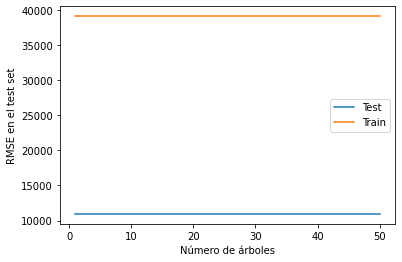

In [66]:
# Definimos listas vacias donde vamos a "appendear" (agregar) los valores
accuracy_test = []
accuracy_train = []

# Calculamos el RMSE sobre el test set
for prediccion_test in ada_clf.staged_predict(X_test):
    accuracy_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
# Calculamos el RMSE sobre el training set    
for prediccion_train in ada_clf.staged_predict(X_train):  
    accuracy_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    
plt.plot(range(1, len(accuracy_test) + 1), accuracy_test, label = 'Test')
plt.plot(range(1, len(accuracy_test) + 1), accuracy_train, label = 'Train')
plt.legend()
plt.ylabel('RMSE en el test set')
plt.xlabel('Número de árboles')

### Optimización de  Hiperparámetros

A continuación se optimizan los hiperparámetros del modelo de ensamble, para lo cual, se optimizará un nivel de profundidad del árbol regresor entre 2 y 20 y un rango de estimadores entre 1 y 11 ya que en el gráfico anterior se apercia que los RMSE obtenidos en el ensamble inicial se estabilizan muy rápido y por último se mantienen las semillas del estimador

In [67]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [68]:
#Estimador y estimador de base
ada_clf_1 = AdaBoostRegressor(DecisionTreeRegressor())


In [69]:
param_grid = {'base_estimator__max_depth': np.arange(2,20),
              'n_estimators':np.arange(1,11),
              'random_state':[20],
              'base_estimator__random_state':[20]}

In [70]:
# ESTRATEGIA 1: Grid Search
model_ada = GridSearchCV(ada_clf_1, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

# Entrenamos: el modelo con la grilla definida arriba y CV con tamaño de Fold=5
model_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'base_estimator__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'base_estimator__random_state': [20],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'random_state': [20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
print("Mejores parametros: "+str(model_ada.best_params_))
print("Mejor Score: "+str(model_ada.best_score_)+'\n')

score=model_ada.cv_results_['mean_train_score']
score

Mejores parametros: {'base_estimator__max_depth': 19, 'base_estimator__random_state': 20, 'n_estimators': 10, 'random_state': 20}
Mejor Score: -1432682973.8999755



array([-5.19390439e+09, -5.19390439e+09, -4.74679915e+09, -4.76684601e+09,
       -4.60223100e+09, -4.57607247e+09, -4.50916143e+09, -4.44399143e+09,
       -4.42176285e+09, -4.44898997e+09, -4.47548827e+09, -4.47548827e+09,
       -4.02339222e+09, -3.95621604e+09, -3.81080906e+09, -3.78736682e+09,
       -3.83273415e+09, -3.83062955e+09, -3.84891212e+09, -3.87546534e+09,
       -3.92908568e+09, -3.92908568e+09, -3.47718564e+09, -3.42688963e+09,
       -3.31264364e+09, -3.29154519e+09, -3.30686561e+09, -3.26797038e+09,
       -3.27469897e+09, -3.28234657e+09, -3.39556060e+09, -3.39556060e+09,
       -3.01871987e+09, -2.99670287e+09, -2.92145215e+09, -2.88148899e+09,
       -2.90479655e+09, -2.88233935e+09, -2.90535152e+09, -2.92012774e+09,
       -2.96382759e+09, -2.96382759e+09, -2.72634521e+09, -2.69999624e+09,
       -2.63919472e+09, -2.61310645e+09, -2.62493283e+09, -2.60543914e+09,
       -2.61653031e+09, -2.61664342e+09, -2.66104490e+09, -2.66104490e+09,
       -2.45530986e+09, -

In [72]:
#Convertimos el score a RMSE
RMSE= np.round(np.sqrt(-score), 2)
RMSE

array([72068.75, 72068.75, 68897.02, 69042.35, 67839.74, 67646.67,
       67150.29, 66663.27, 66496.34, 66700.75, 66899.09, 66899.09,
       63430.22, 62898.46, 61731.75, 61541.59, 61909.08, 61892.08,
       62039.6 , 62253.24, 62682.42, 62682.42, 58967.67, 58539.64,
       57555.57, 57371.99, 57505.35, 57166.16, 57224.99, 57291.77,
       58271.44, 58271.44, 54942.88, 54742.15, 54050.46, 53679.5 ,
       53896.16, 53687.42, 53901.31, 54038.21, 54441.05, 54441.05,
       52214.42, 51961.49, 51373.09, 51118.55, 51234.1 , 51043.5 ,
       51152.03, 51153.14, 51585.32, 51585.32, 49551.08, 49511.3 ,
       49078.11, 48837.71, 48790.67, 48711.89, 48740.91, 48726.15,
       49283.73, 49283.73, 47309.8 , 47283.79, 46731.16, 46557.07,
       46412.03, 46244.44, 46222.65, 46136.37, 47151.9 , 47151.9 ,
       44766.74, 44683.08, 44033.11, 43868.68, 43710.72, 43535.89,
       43422.35, 43320.79, 45103.69, 45103.69, 42101.51, 42062.03,
       41146.43, 41084.19, 40669.04, 40618.9 , 40460.18, 40308

La optimización mediante GridSearch y validación cruzada indican que el mejor resultao se optiene para una profundidad de 19 y 10 estimadores o árboles en el ensamble, con un RMSE sobre el set de entrenamiento de 9596. Ahora probemos el modelos sobre el set de test

In [73]:
#Predecimos en los datos de test
prediction_ada = model_ada.predict(X_test)

In [74]:
rmse_test_ada= np.sqrt(mean_squared_error(y_test, prediction_ada))
rmse_test_ada

37269.37388941552

El RMSE para el ensamble optimizado sobre el set de test es de 37269.3739. Por lo tanto, la métrica obtenida para el conjunto de entrenamiento mejora respecto al modelo inicial y para el conjunto de prueba no mejora pero sigue siendo un resultado aceptable.

### Validación Cruzada para el ensamble

In [75]:
from sklearn.model_selection import cross_validate

In [76]:
#Validación cruzada del ensamble del arbol regresor con los parámetros optimizados
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=19, random_state=20),n_estimators=10,random_state=20)
ada_scores = cross_validate(ada, X, y, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
print(ada_scores)

{'fit_time': array([9.63360882, 9.59571409, 9.38138628, 9.4915626 , 9.56471252]), 'score_time': array([0.14189076, 0.16610956, 0.15361071, 0.14930701, 0.13752961]), 'test_score': array([-1.33106850e+09, -1.35379864e+09, -1.46832657e+09, -1.47959433e+09,
       -1.21563879e+09]), 'train_score': array([-1.08880133e+08, -1.09800907e+08, -1.10156595e+08, -1.08725368e+08,
       -1.09492373e+08])}


Con los resultados de la validación cruzada, procedemos a calcular el valor promedio de la métrica RMSE para comparar el modelo optimizado respecto a los anteriores.

In [77]:
#Calculemos el RMSE promedio para train y test
RMSE_ada_train=np.sqrt(-(ada_scores['train_score'])).mean()
RMSE_ada_test=np.sqrt(-(ada_scores['test_score'])).mean()
print(f'El RMSE_train promedio es de:{RMSE_ada_train}', f'y el RMSE_test promedio es de:{RMSE_ada_test}')

El RMSE_train promedio es de:10459.94288421822 y el RMSE_test promedio es de:36985.61422238916


## PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

Respecto a los resultados del modelo del proyecto 1 el cual arrojó unas métricas de RMSE_train= 64721.0698 y RMSE_test= 146702.4405, cualquiera de los modelos presentados en la parte B de este proyecto 2 y luego de haber aplicado la transformación de datos en la parte A de imputación de datos, eliminación de atípicos y encoding presenta mejoras en la métrica de evaluación de los modelos lo cual indica que cualquier modelo de la parte B es mejor respecto a nuestro primer modelo.

Por otra parte, si comparamos entre los modelos de la parte B, el ensamble Boosting es el que en general representa mejor desempeño, el cual, luego de la optimización de parámetros y de la validación cruzada, tiene unas métricas de RMSE_train= 10420.8553 y RMSE_test= 36776.6959.

A continuación consultaremos a partir del ensamble inicial la importancia de cada variable

In [78]:
#Importancia de cada variable
ada_clf.feature_importances_

array([0.18232928, 0.16020518, 0.01819931, 0.01415111, 0.26782107,
       0.12025828, 0.20396294, 0.00412907, 0.02894375])

In [79]:
#Variables utilizadas
X.columns

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'Casa', 'Departamento'],
      dtype='object')

De acuerdo a los resultados anteriores, las variables de mayor importancia fueron el número de baños y el área construída con un 26,7% y 20,4% de importancia respectivamente, seguidas de la latitud, longitud y el área total con porcentajes de importancia de 18%, 16% y 12% respectivamente.

Ahora revisemos la importancia de los árboles del ensamble:

(0.0, 51.0)

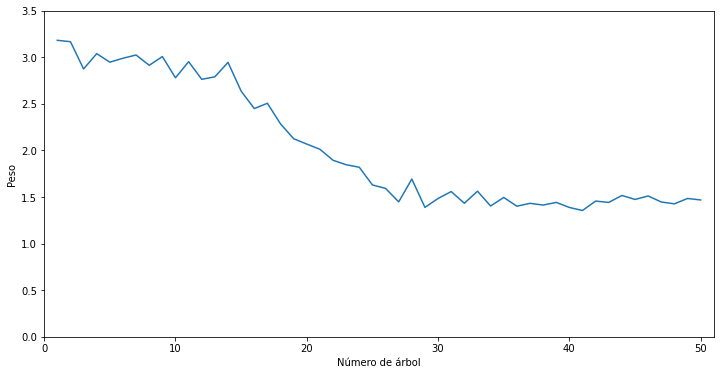

In [80]:
# Puede que el algoritmo termine antes de agregar todos los arboles
# Tomamos entonces la cantidad de arboles que realmente tiene el ensamble
numero_arboles = len(ada_clf)

# En la variable estimator_weights_ esta el peso de cada arbol
peso_arbol = ada_clf.estimator_weights_[:numero_arboles]

# Calculamos la importancia de los features.
peso_feature = ada_clf.feature_importances_

# Graficamos
plt.figure(figsize = (12,6))
# En el eje 'x' ponemos el índice (número) de cada arbol, en el 'y' los pesos
plt.plot(range(1, numero_arboles + 1), peso_arbol)
plt.ylabel('Peso')
plt.xlabel('Número de árbol')
plt.ylim((0, peso_arbol.max() * 1.1))
plt.xlim((0, numero_arboles + 1))

En cuanto a los pesos de cada árbol, se aprecia un descenso marcado en el nivel de importancia de los árboles número 5 y 30 aproximadamente, por lo cual, miremos la importancia de las variables para ambos árboles:

In [81]:
importancias= pd.DataFrame(np.array([ada_clf[0].feature_importances_,ada_clf[14].feature_importances_,ada_clf[25].feature_importances_,ada_clf[49].feature_importances_]),columns=X.columns)
importancias

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento
0,0.163105,0.141605,0.011390,0.009746,0.335774,0.143177,0.156857,0.002207,0.036139
1,0.207176,0.182267,0.017741,0.012028,0.278543,0.104400,0.173879,0.004605,0.019362
2,0.189335,0.150992,0.021671,0.013377,0.307384,0.114904,0.174276,0.003333,0.024727
3,0.188922,0.138753,0.030071,0.021463,0.117540,0.113355,0.367203,0.007026,0.015667


En el dataframe anterior se observa el porcentaje de importancia de cada variable para los árboles 1, 15, 26 y 50 del ensamble. En general estos árboles no se diferencian mucho en cuanto a los porcentajes de importancia que le asigna a los atributos pero lo que sí se puede rescatar es que a medida que avanza el ensamble va adquiriendo mayor importancia el área construída ya que para el primer árbol tiene un importancia del 16% y para el último árbol su importancia se eleva al 37%, mientras que lo contrario le ocurre al atributo número de baños que inicia con una importancia del 34% y termina con una importancia del 11% y es por este comportamiento que ambas variables terminan siendo las más relevantes para todo el ensamble ya que es principalmente a partir de los errores en la predicción sobre estas variables que los siguientes árboles van aprendiendo.

A continuación se muestra la distribución de los errores de regresión de caca uno de los árboles de nuestro modelo de ensamble

In [82]:
#Error de regresión de cada uno de los árboles del ensamble
errores= ada_clf.estimator_errors_[:numero_arboles]
errores

array([0.03982001, 0.04040522, 0.0533975 , 0.04568117, 0.0498427 ,
       0.04787257, 0.0463216 , 0.05145061, 0.04706463, 0.05838895,
       0.04959411, 0.0593149 , 0.0578278 , 0.04993111, 0.06678469,
       0.07945066, 0.07540333, 0.09236755, 0.10655681, 0.11219778,
       0.1178601 , 0.13067925, 0.13621614, 0.13946259, 0.16383822,
       0.16892384, 0.1902616 , 0.15533227, 0.19956468, 0.18468186,
       0.17378267, 0.19256873, 0.17323512, 0.19720941, 0.18302067,
       0.19754028, 0.19266158, 0.19557092, 0.19118754, 0.19968181,
       0.20490313, 0.18895088, 0.19117627, 0.17987206, 0.18625236,
       0.18073392, 0.19045138, 0.19352884, 0.18469148, 0.1871088 ])

Text(0.5, 0, 'Número de árbol')

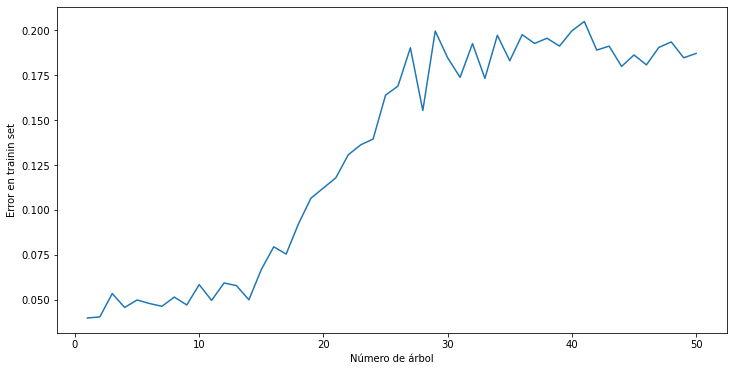

In [83]:
# Tomamos entonces la cantidad de arboles que tiene el ensamble
numero_arboles = len(ada_clf)

# Calculamos el error DE CADA ARBOL en el ensamble. En estimator_errors_ esta el error que comete cada uno.
errores_arboles = ada_clf.estimator_errors_[:numero_arboles]

# Graficamos
plt.figure(figsize = (12,6))
# En el eje 'x' ponemos el índice (número) de cada arbol, en el 'y' el accuracy de cada arbol
plt.plot(range(1, numero_arboles + 1), errores_arboles)
plt.ylabel('Error en trainin set')
plt.xlabel('Número de árbol')

En la distribución de errores de regresión de cada árbol del ensamble se observa una tendencia al incremento en el error a medida que el ensamble avanza al siguiente arbol y como se veía en la distribución del peso de cada arbol, aun un aumento significativo en los errores de estimación entre los árboles (estimadores) 15 y 25, lo cual es coherente con la disminución en el peso o importancia de los árboles siguientes que les asigna el modelo. 
Por otra parte, como ya se había mencionado, a partir del árbol 29 aproximadamente se presentan los mayores errores ya que el modelo cambia la importancia que le da a las variables predictoras en los árboles, siendo estos los casos más difíciles de predecir para el modelo.

Como conclusión final mencinar que el modeolo de ensamble era el que esperaba fuese el mejor modelo por la forma como el mismo opera aunque sorprende los features que terminaron siendo más relevantes para el modelo, pues esperaba que el tipo de propiedad al incluírlo en el modelo (Casa, Departamento, PH) fueran relevantes para la predicción y resultaron ser las de menor relevancia, mientras que la latitud y la longitud fueron más relevantes de lo esperado lo cual podría ser un buen indicio de que la ubicación es una variable importante en la fijación del precio de una propiedad y por último, el área construída y el número de baños terminaron siendo relevantes como se esperaba, pues se hay estudios qeu incluso han demostrado que un baño adicional incrementa en mayor proporción el valor de una propiedad respecto a una habitación adicional.

DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?